In [1]:
import pandas as pd
from utils import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import ast

#### Retrieve Old KLSum & LexRank Info

In [2]:
old_test_bills = pd.read_csv('test_kl_lr.csv')

In [3]:
def get_rouge(row, algo, rouge_value):
    if algo == 'KL':
        try:
            rouge_dict = ast.literal_eval(row.KL_rouge_dict)
        except:
            return None
    elif algo == 'LR':
        try:
            rouge_dict = ast.literal_eval(row.LR_rouge_dict)
        except:
            return None
    else:
        raise 'incorrect algo'
    return rouge_dict[rouge_value]

In [4]:
old_test_bills['KL_rouge1_R'] = old_test_bills['KL_rouge1']
old_test_bills['KL_rouge2_R'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_recall'), axis=1)
old_test_bills['KL_rougeL_R'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_recall'), axis=1)
old_test_bills['LR_rouge1_R'] = old_test_bills['LR_rouge1']
old_test_bills['LR_rouge2_R'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_recall'), axis=1)
old_test_bills['LR_rougeL_R'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_recall'), axis=1)

old_test_bills['KL_rouge1_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_precision'), axis=1)
old_test_bills['KL_rouge2_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_precision'), axis=1)
old_test_bills['KL_rougeL_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_precision'), axis=1)
old_test_bills['LR_rouge1_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_precision'), axis=1)
old_test_bills['LR_rouge2_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_precision'), axis=1)
old_test_bills['LR_rougeL_P'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_precision'), axis=1)

old_test_bills['KL_rouge1_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge1_f'), axis=1)
old_test_bills['KL_rouge2_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rouge2_f'), axis=1)
old_test_bills['KL_rougeL_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'KL', 'rougeL_F'), axis=1)
old_test_bills['LR_rouge1_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge1_f'), axis=1)
old_test_bills['LR_rouge2_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rouge2_f'), axis=1)
old_test_bills['LR_rougeL_F'] = old_test_bills.apply(lambda x: get_rouge(x, 'LR', 'rougeL_F'), axis=1)

In [5]:
old_test_bills.drop(['KL_rouge1', 'KL_rouge_dict', 'LR_rouge1', 'LR_rouge_dict', 'Unnamed: 0'], inplace=True, axis=1)

In [6]:
old_test_bills.head()

,CRS_summary,CRS_summary_clean,ID,bill_length,bill_text,bill_text_clean,summ_length,KL_summary,LR_summary,KL_rouge1_R,...,KL_rougeL_P,LR_rouge1_P,LR_rouge2_P,LR_rougeL_P,KL_rouge1_F,KL_rouge2_F,KL_rougeL_F,LR_rouge1_F,LR_rouge2_F,LR_rougeL_F
0,Pay What You Owe Before You Go Act - Amends th...,Pay What You Owe Before You Go Act - Amends th...,113_S2895_IS,25,To amend the Internal Revenue Code to include ...,To amend the Internal Revenue Code to include ...,1,To amend the Internal Revenue Code to include ...,The subpart F income of any applicable control...,0.395349,...,0.444444,0.284091,0.126506,0.120482,0.430380,0.310680,0.447943,0.381679,0.188341,0.126006
1,United States-Turkey Free Trade Promotion Act ...,United States-Turkey Free Trade Promotion Act ...,114_HR3685_IH,21,To direct the United States Trade Representati...,To direct the United States Trade Representati...,2,To direct the United States Trade Representati...,To direct the United States Trade Representati...,0.615385,...,0.175573,0.384615,0.256881,0.212500,0.393443,0.283871,0.188644,0.512821,0.368421,0.224319
2,(Sec. 1) This bill revises cost-sharing under ...,(Sec. 1) This bill revises cost-sharing under ...,114_S2616_IS,16,To modify certain cost-sharing and revenue pro...,To modify certain cost-sharing and revenue pro...,4,Be it enacted by the Senate and House of Repre...,Be it enacted by the Senate and House of Repre...,0.257143,...,0.436364,0.523810,0.382114,0.455621,0.333333,0.227451,0.213975,0.465608,0.310231,0.346647
3,EB-5 Integrity Act of 2016.\nThis bill amends ...,EB-5 Integrity Act of 2016. This bill amends t...,114_HR4530_IH,368,To implement integrity measures to strengthen ...,To implement integrity measures to strengthen ...,19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Directs the Comptroller General (GAO), beginni...","Directs the Comptroller General (GAO), beginni...",113_S774_IS,30,To require the Comptroller General of the Unit...,To require the Comptroller General of the Unit...,3,( 6 ) any disparities or trends detectable dur...,The purpose of the report required under subse...,0.274074,...,0.700935,0.644068,0.444444,0.409091,0.408840,0.305556,0.266650,0.600791,0.390244,0.354530


In [7]:
in_dir1 = 'out/113_114_115/'
in_dir2 = 'test_for_less_3k/'
NUM_SENTENCE = 6

#### Get New Test Set Info

In [8]:
new_test_bills = pd.read_csv('test_for_less_3k/test_113_114_115.csv')

In [9]:
new_test_bills.head()

,Congress,Directory,ID,Number,Subtype,Summary,Type,Version,to_use,bill_len
0,113,./data/113/bills/s/s2895/text-versions/is,113_S2895_IS,S2895,S,1,Bills,IS,1,25
1,114,./data/114/bills/hr/hr3685/text-versions/ih,114_HR3685_IH,HR3685,HR,1,Bills,IH,1,21
2,114,./data/114/bills/s/s2616/text-versions/is,114_S2616_IS,S2616,S,1,Bills,IS,1,16
3,114,./data/114/bills/hr/hr4530/text-versions/ih,114_HR4530_IH,HR4530,HR,1,Bills,IH,1,368
4,113,./data/113/bills/s/s774/text-versions/is,113_S774_IS,S774,S,1,Bills,IS,1,30


#### Get extractive summaries & their ROUGE scores

In [10]:
def compile_all_bills(row):
    ID = row.ID
    old_row = old_test_bills[old_test_bills.ID == ID]
    if isinstance(old_row.KL_summary.iloc[0], str):
        new_row = old_row
    else:
        new_row_dict = {}
        
        # get bill and CRS summary info
        new_row_dict['CRS_summary'] = old_row.CRS_summary
        clean_summ = old_row.CRS_summary_clean
        new_row_dict['CRS_summary_clean'] = clean_summ
        new_row_dict['ID'] = ID
        new_row_dict['bill_length'] = old_row.bill_length
        new_row_dict['bill_text'] = old_row.bill_text
        new_row_dict['bill_text_clean'] = old_row.bill_text_clean
        new_row_dict['summ_length'] = old_row.summ_length
        
        # get KL summary
        with open('test_for_less_3k/KL/KL_'+ID+'.out') as f:
            summary_KL = convert_summary(f.readlines())
        summary_KL_clean = ' '.join([str(sentence) for sentence in summary_KL])
        new_row_dict['KL_summary'] = summary_KL_clean
        
        # get LR summary
        with open('test_for_less_3k/LexRank/LexRank_'+ID+'.out') as f:
            summary_LR = convert_summary(f.readlines())
        summary_LR_clean = ' '.join([str(sentence) for sentence in summary_LR])
        new_row_dict['LR_summary'] = summary_LR_clean

        # evaluate automatic summaries
        CRS_sumy = convert_summary(clean_summ)
        rouge_KL = eval_sumy(summary_KL, CRS_sumy)
        for k,v in rouge_KL.items():
            new_row_dict['KL_'+k] = v
        rouge_LR = eval_sumy(summary_LR, CRS_sumy)
        for k,v in rouge_LR.items():
            new_row_dict['LR_'+k] = v
            
        new_row = pd.DataFrame(new_row_dict)
    return new_row

In [11]:
for i in range(len(new_test_bills)):
    if i == 0:
        all_bills = compile_all_bills(new_test_bills.iloc[i])
    else:
        all_bills = pd.concat([all_bills, compile_all_bills(new_test_bills.iloc[i])], axis=0)

In [19]:
all_bills.shape

(2298, 27)

#### Get abstractive summaries & their ROUGE scores

In [24]:
in_dir = 'decode_test_400maxenc_4beam_35mindec_100maxdec_ckpt-27375/'

In [25]:
all_results = []
for filename in os.listdir(in_dir+'decoded/'):
    this_result = {}
    
    # which bill is this
    bill_id = filename.split('_')[0]
    
    # get model summary
    with open(in_dir+'decoded/'+filename) as f:
        model_summary = f.readlines()
    this_result['model_summary'] = ' '.join(model_summary)
    
    # get reference summary
    with open(in_dir+'reference/'+bill_id+'_reference.txt') as f:
        ref_summary = f.readlines()
    this_result['ref_summary'] = ' '.join(ref_summary)
    
    # evaluate
    rouge_see = eval_sumy(convert_summary(model_summary), convert_summary(ref_summary))
    for k,v in rouge_see.items():
        this_result['see_'+k] = v
    
    all_results.append(this_result)

In [26]:
see_df = pd.DataFrame(all_results)

In [27]:
see_df.shape

(2298, 11)

#### Combine

In [28]:
all_bills = pd.concat([all_bills, see_df], axis=1)

In [29]:
all_bills.head()

,CRS_summary,CRS_summary_clean,ID,KL_rouge1_F,KL_rouge1_P,KL_rouge1_R,KL_rouge2_F,KL_rouge2_P,KL_rouge2_R,KL_rougeL_F,...,ref_summary,see_rouge1_F,see_rouge1_P,see_rouge1_R,see_rouge2_F,see_rouge2_P,see_rouge2_R,see_rougeL_F,see_rougeL_P,see_rougeL_R
0,Pay What You Owe Before You Go Act - Amends th...,Pay What You Owe Before You Go Act - Amends th...,113_S2895_IS,0.430380,0.472222,0.395349,0.310680,0.347826,0.280702,0.447943,...,pay what you owe before you go act - amends th...,0.593407,0.551020,0.642857,0.413793,0.400000,0.428571,0.471482,0.467742,0.475410
1,United States-Turkey Free Trade Promotion Act ...,United States-Turkey Free Trade Promotion Act ...,114_HR3685_IH,0.393443,0.289157,0.615385,0.283871,0.196429,0.511628,0.188644,...,united states-turkey free trade promotion act ...,0.644068,0.826087,0.527778,0.507042,0.600000,0.439024,0.559891,0.666667,0.511628
2,(Sec. 1) This bill revises cost-sharing under ...,(Sec. 1) This bill revises cost-sharing under ...,114_S2616_IS,0.333333,0.473684,0.257143,0.227451,0.386667,0.161111,0.213975,...,(sec. 1) this bill revises cost-sharing under ...,0.408759,0.823529,0.271845,0.266667,0.681818,0.165746,0.166591,0.722222,0.160494
3,EB-5 Integrity Act of 2016.\nThis bill amends ...,EB-5 Integrity Act of 2016. This bill amends t...,114_HR4530_IH,0.017391,0.009524,0.100000,0.000000,0.000000,0.000000,0.003337,...,eb-5 integrity act of 2016 .\n this bill amend...,0.184211,0.656250,0.107143,0.079012,0.380952,0.044077,0.067678,0.627907,0.066998
4,"Directs the Comptroller General (GAO), beginni...","Directs the Comptroller General (GAO), beginni...",113_S774_IS,0.408840,0.804348,0.274074,0.305556,0.758621,0.191304,0.266650,...,"directs the comptroller general (gao), beginni...",0.383234,0.842105,0.248062,0.255319,0.666667,0.157895,0.155178,0.714286,0.150000


In [35]:
all_bills.to_csv('all_bills.csv')

#### Visualizations

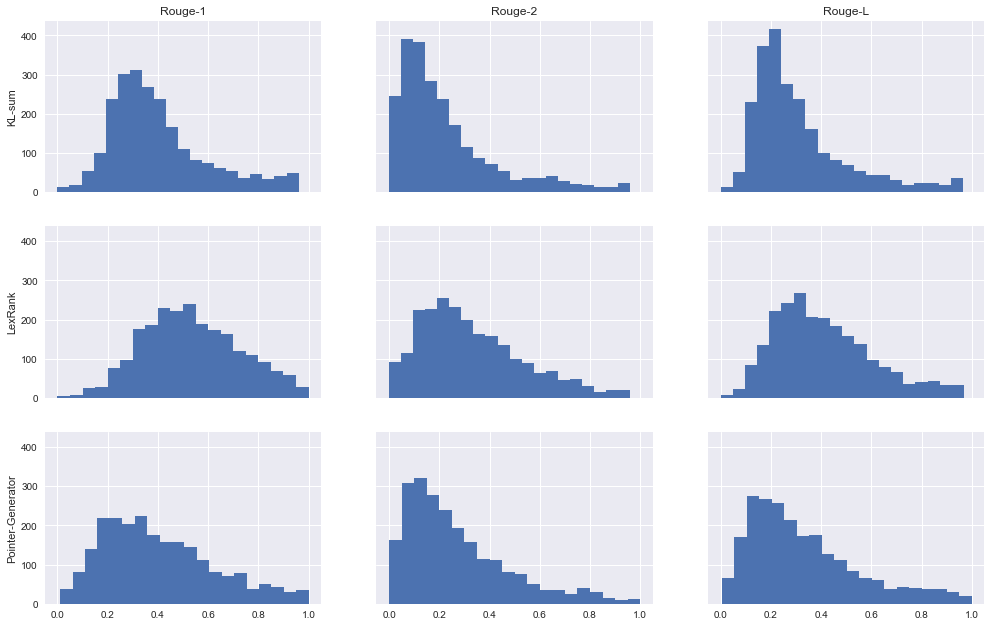

In [46]:
plt.style.use('seaborn')
fig, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True, sharey=True)
all_bills.KL_rouge1_R.hist(bins=20, ax=ax[0,0])
all_bills.KL_rouge2_R.hist(bins=20, ax=ax[0,1])
all_bills.KL_rougeL_R.hist(bins=20, ax=ax[0,2])
all_bills.LR_rouge1_R.hist(bins=20, ax=ax[1,0])
all_bills.LR_rouge2_R.hist(bins=20, ax=ax[1,1])
all_bills.LR_rougeL_R.hist(bins=20, ax=ax[1,2])
all_bills.see_rouge1_R.hist(bins=20, ax=ax[2,0])
all_bills.see_rouge2_R.hist(bins=20, ax=ax[2,1])
all_bills.see_rougeL_R.hist(bins=20, ax=ax[2,2])
ax[0,0].set_ylabel('KL-sum')
ax[1,0].set_ylabel('LexRank')
ax[2,0].set_ylabel('Pointer-Generator')
ax[0,0].set_title('Rouge-1')
ax[0,1].set_title('Rouge-2')
ax[0,2].set_title('Rouge-L')
plt.show()

In [31]:
all_bills.mean()

KL_rouge1_F      0.353909
KL_rouge1_P      0.371386
KL_rouge1_R      0.400904
KL_rouge2_F      0.188997
KL_rouge2_P      0.200889
KL_rouge2_R      0.226120
KL_rougeL_F      0.213461
KL_rougeL_P      0.250263
KL_rougeL_R      0.309571
LR_rouge1_F      0.414934
LR_rouge1_P      0.381204
LR_rouge1_R      0.531855
LR_rouge2_F      0.238794
LR_rouge2_P      0.214612
LR_rouge2_R      0.330763
LR_rougeL_F      0.234278
LR_rougeL_P      0.237606
LR_rougeL_R      0.411733
bill_length     75.169713
summ_length      5.297650
see_rouge1_F     0.475677
see_rouge1_P     0.703703
see_rouge1_R     0.405236
see_rouge2_F     0.314907
see_rouge2_P     0.491932
see_rouge2_R     0.271482
see_rougeL_F     0.319381
see_rougeL_P     0.552313
see_rougeL_R     0.336008
dtype: float64

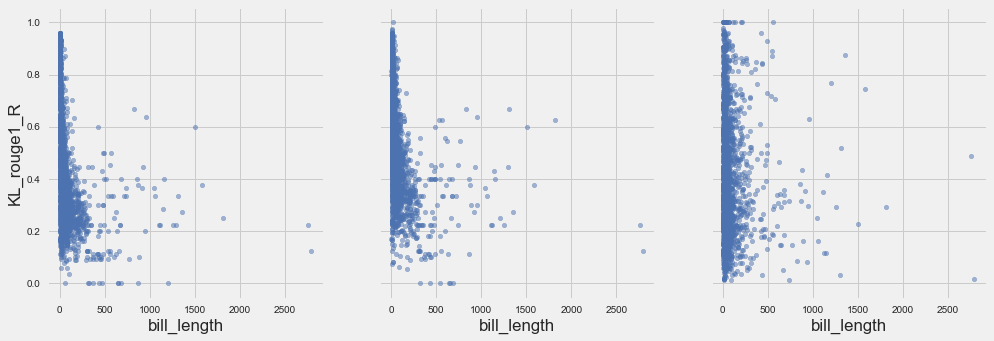

In [40]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
all_bills.plot(x='bill_length', y='KL_rouge1_R', kind='scatter', alpha=0.5, ax=ax[0])
all_bills.plot(x='bill_length', y='LR_rouge1_R', kind='scatter', alpha=0.5, ax=ax[1])
all_bills.plot(x='bill_length', y='see_rouge1_R', kind='scatter', alpha=0.5, ax=ax[2])

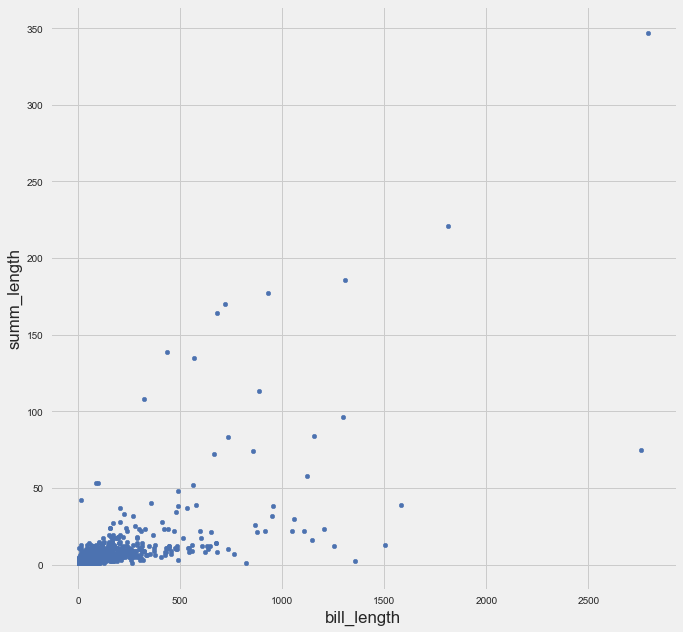

In [45]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, figsize=(10,10))
all_bills.plot(x='bill_length', y='summ_length', kind='scatter', ax=ax)